## Telco Churn Data Analysis
This notebook includes the exploratory data analysis I performed for my storytelling project to analyze if there is a difference in churn rate for month to month fiber customers with auto pay vs those without auto pay -->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [211]:
df = pd.read_csv('cust_details.csv')

In [212]:
df.head()
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'internet_plan', 'contract_type',
       'plan', 'payment_type', 'monthly_charges', 'total_charges', 'churn',
       'churn_rate', 'tenure'],
      dtype='object')

In [213]:
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,1.325004,1.222916,0.690473,64.761692,2283.300441,32.368309
std,0.368612,0.642730,0.778877,0.833755,30.090047,2266.771362,24.597021
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.500000,401.450000,9.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.475000,29.000000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3794.737500,55.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.000000


In [31]:
df.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
internet_plan         object
contract_type          int64
plan                  object
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
churn_rate            object
tenure                 int64
dtype: object

In [185]:
df.corr()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,tenure_l,tenure_auto,tenure_nonauto,revenue_auto,cust_auto
is_senior_citizen,1.000000,0.113791,0.259390,-0.142554,0.220173,0.102411,0.016107,0.168386,0.168386,0.123986,0.068485,-0.250000
phone_service,0.113791,1.000000,0.307988,0.083343,0.490700,0.412495,0.258792,0.347877,0.347877,0.338381,0.414671,-0.316228
internet_service,0.259390,0.307988,1.000000,-0.290189,0.905491,0.428212,0.032938,NaN,NaN,NaN,NaN,-0.500000
contract_type,-0.142554,0.083343,-0.290189,1.000000,-0.074195,0.450306,0.671321,NaN,NaN,NaN,NaN,-0.250000
monthly_charges,0.220173,0.490700,0.905491,-0.074195,1.000000,0.651065,0.247633,0.381190,0.381190,0.468611,1.000000,-0.512823
total_charges,0.102411,0.412495,0.428212,0.450306,0.651065,1.000000,0.826241,0.985126,0.985126,0.990197,0.496206,0.032474
tenure,0.016107,0.258792,0.032938,0.671321,0.247633,0.826241,1.000000,1.000000,1.000000,1.000000,0.381190,0.187212
tenure_l,0.168386,0.347877,NaN,NaN,0.381190,0.985126,1.000000,1.000000,1.000000,NaN,0.381190,NaN
tenure_auto,0.168386,0.347877,NaN,NaN,0.381190,0.985126,1.000000,1.000000,1.000000,NaN,0.381190,NaN
tenure_nonauto,0.123986,0.338381,NaN,NaN,0.468611,0.990197,1.000000,NaN,NaN,1.000000,NaN,NaN


<AxesSubplot:>

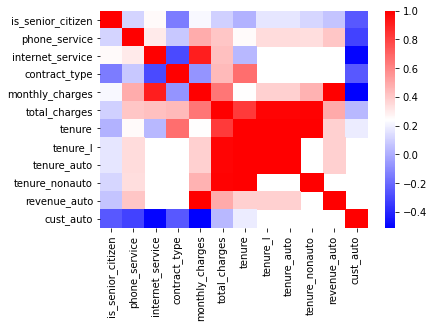

In [186]:
sns.heatmap(df.corr(), cmap = 'bwr')

In [52]:
# number of customers who have churned
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [30]:
# total number of monthly fiber customers
mfiber = df.customer_id[(df.plan == 'monthly') & (df.internet_plan == 'fiber')]
mfiber.count()

2128

In [60]:
# total number of monthly fiber customers with auto pay
df.customer_id[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('automatic'))].count()

620

In [59]:
# total number of monthly fiber customers without auto pay
df.customer_id[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check'))].count()

1508

In [64]:
# number of monthly fiber customers with auto pay who churn
df.customer_id[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('automatic')) & (df.churn == 'Yes')].count()

271

In [62]:
# number of monthly fiber customers without auto pay who churn
df.customer_id[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')].count()

891

% of monthly fiber auto pay customers who churn = 271/620 = 43.7%

% of monthly fiber non auto pay customers who churn = 891/1508 = 59.1%

In [149]:
#tenure length for monthly fiber auto customers
df.tenure[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('automatic')) & (df.churn == 'Yes')]


53      39
84      12
92      25
126      4
142      1
157     26
174     49
198     26
226     58
235     32
268     59
271     35
336      4
338     28
340      5
416     49
417     28
432     24
436     16
437     67
445      7
575     53
594     13
598     10
599      5
642     10
670     70
683      5
705     41
734      1
814     39
847     50
852     14
868      9
876     16
909     52
923     10
963     21
1014    10
1026    28
1062    31
1074     4
1090    69
1093    53
1095    35
1137    13
1180    47
1267    11
1323    16
1330     3
1369    24
1398     7
1402     2
1482    15
1538    21
1549     2
1565     4
1586    16
1649     7
1701    39
1718     6
1728    38
1786     4
1789    12
1802    69
1850    30
1898     9
1976    20
1986    45
2022     4
2045     4
2073     2
2075     4
2097     2
2104    11
2107    32
2143     5
2162    12
2163    27
2173     7
2222     1
2234    49
2239     3
2244    57
2248    17
2252     8
2288    39
2359     4
2363     5
2389    64
2488    30

In [151]:
# number of people who churned at each tenure month
df.tenure[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('automatic')) & (df.churn == 'Yes')].value_counts()
df.tenure[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')].value_counts()

1     191
2      59
3      44
4      39
5      38
7      30
11     27
8      23
13     23
6      22
9      21
10     18
14     17
12     17
15     16
16     16
26     15
22     14
24     14
18     13
21     13
17     12
31     11
33     11
30     11
19     10
20      9
43      8
27      7
29      7
54      7
38      7
25      7
23      7
34      6
36      6
42      6
49      6
50      5
47      5
35      5
28      5
37      5
45      5
60      4
57      4
51      4
48      4
32      4
46      3
41      3
44      3
55      3
59      2
68      2
64      2
39      2
40      2
53      2
69      2
61      1
62      1
63      1
52      1
66      1
67      1
72      1
Name: tenure, dtype: int64

In [148]:
# create new column                                                                                                                  
df['tenure_auto'] = df.tenure[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('automatic')) & (df.churn == 'Yes')]

# avg tenure of auto pay customers
df['tenure_auto'].mean()                                                                                                          
                                                                                                                                                                                                                                    
                                                                                                                  

21.66789667896679

In [143]:
# number of monthly fiber non auto customers who churned and their tenure length(index)
df.tenure[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')]

2        4
3       13
4        3
21      13
54      12
64       1
71      21
75       7
77      15
82       2
86       1
93       1
110     10
112      6
119     15
127      2
139      1
143     15
155     27
159      2
163     31
180      1
186      8
190      5
194     61
201      1
205     23
209     68
210      8
213      1
214      3
216      5
217      3
221     42
223      6
228     29
234     36
248     21
251     17
252      3
261      2
262      1
274      3
276     60
311     23
319     43
327     54
332      1
335      1
344      1
347      1
354      1
357     31
359     15
363     57
379      9
389     26
391     22
401     63
411     20
434      2
435     13
440     48
443     21
464      1
466     15
468      1
469      2
472     13
478      4
482      4
487      8
491      4
492      1
498      9
508      1
519      2
526      3
531      9
550      1
555     26
589     19
597      9
602      4
605     27
608     51
612     11
627      3
629      3
631      7
641     35

In [146]:
# create new column                                                                                                                  
df['tenure_nonauto'] = df.tenure[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')]

# avg tenure of non auto pay customers
df['tenure_nonauto'].mean()

14.628507295173963

highest churn for non auto pay customers in months 1-5: lost 371 customers in first 5 months with the highest churn in the first month

lose 61 auto pay customers in the first 5 months with highest churn in second month

Based on that recommendation could be to give auto pay customers $5 off their monthly bill after they enroll in auto pay for 2 months


In [176]:
# avg monthly charge for non auto pay customers who churned >> $86
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')].agg(['mean'])

#avg monthly charge for auto pay customers who churned >> $87
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')].agg(['mean'])


mean    86.070426
Name: monthly_charges, dtype: float64

In [180]:
# revenue lost for non auto pay customers

# 86 * 14.6 * 891 = 1118740

# revenue lost for auto pay customers

# 87 * 21.7 * 271 = 511621

1118739.5999999999

In [81]:
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')].value_counts().sort_values().nlargest(1, keep = 'all')

74.4    9
Name: monthly_charges, dtype: int64

referral code for auto pay customers to get the friends and family discount

how much will revenue change if non auto pay customers become auto pay? Might reduce monthly charges but revenue will increase overall

In [82]:
# number of customers with each type of monthly charge
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')].value_counts().sort_values().nlargest(1, keep = 'all')

85.35    3
84.80    3
74.40    3
69.75    3
94.70    3
74.90    3
Name: monthly_charges, dtype: int64

In [84]:
#highest monthly charge for auto pay customer who churned
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')].nlargest(1, keep = 'all')

3046    114.5
Name: monthly_charges, dtype: float64

In [85]:
#highest monthly charge for non auto pay customer who churned
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')].nlargest(1, keep = 'all')

1579    117.45
Name: monthly_charges, dtype: float64

In [156]:
# min monthly charges for auto pay customers who churned
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')].nsmallest(1, keep = 'all')

4416    69.0
Name: monthly_charges, dtype: float64

In [87]:
# min monthly charges for non auto pay customers who churned
df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')].nsmallest(1, keep = 'all')

2636    67.75
Name: monthly_charges, dtype: float64

max monthly charge is higher for non auto pay customers vs auto pay customers but the min monthly charge is lower for non auto pay customers

In [170]:
# revenue from auto pay customers
df['revenue_auto'] = df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')]
df['cust_auto'] = df.monthly_charges[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')].value_counts()
df.tail(40)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,internet_plan,contract_type,plan,payment_type,monthly_charges,total_charges,churn,churn_rate,tenure,tenure_l,tenure_auto,tenure_nonauto,revenue_auto,cust_auto
7003,9938-PRCVK,Female,0,Yes,Yes,1,0,not_fiber,2,not_monthly,Bank transfer (automatic),19.70,804.25,No,2,41,NaN,NaN,NaN,NaN,NaN
7004,9938-TKDGL,Male,0,Yes,Yes,1,2,fiber,2,not_monthly,Electronic check,99.55,6668.00,No,2,67,NaN,NaN,NaN,NaN,NaN
7005,9938-ZREHM,Female,0,Yes,No,2,1,not_fiber,1,not_monthly,Mailed check,72.10,2658.40,No,2,37,NaN,NaN,NaN,NaN,NaN
7006,9940-HPQPG,Female,0,Yes,No,2,2,fiber,0,monthly,Bank transfer (automatic),91.75,865.80,Yes,2,9,9.0,9.0,NaN,91.75,NaN
7007,9940-RHLFB,Female,0,No,No,1,2,fiber,0,monthly,Electronic check,75.30,75.30,Yes,9,1,NaN,NaN,1.0,NaN,NaN
7008,9943-VSZUV,Male,1,No,No,2,2,fiber,0,monthly,Mailed check,75.70,5060.85,No,2,67,NaN,NaN,NaN,NaN,NaN
7009,9944-AEXBM,Male,0,No,No,2,2,fiber,0,monthly,Bank transfer (automatic),85.65,2664.30,No,2,31,NaN,NaN,NaN,NaN,NaN
7010,9944-HKVVB,Female,0,No,No,1,2,fiber,0,monthly,Electronic check,95.10,307.40,Yes,2,3,NaN,NaN,3.0,NaN,NaN
7011,9945-PSVIP,Female,0,Yes,Yes,1,0,not_fiber,2,not_monthly,Mailed check,18.70,383.65,No,2,21,NaN,NaN,NaN,NaN,NaN
7012,9947-OTFQU,Male,1,No,No,1,2,fiber,0,monthly,Electronic check,74.40,1074.30,Yes,2,14,NaN,NaN,14.0,NaN,NaN


In [190]:
# new df with only monthly fiber customers with auto pay who have churned 
new_df = df[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('auto')) & (df.churn == 'Yes')]
new_df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,internet_plan,contract_type,plan,payment_type,monthly_charges,total_charges,churn,churn_rate,tenure,tenure_l,tenure_auto,tenure_nonauto,revenue_auto,cust_auto
53,0093-XWZFY,Male,0,No,No,2,2,fiber,0,monthly,Credit card (automatic),104.50,4036.85,Yes,2,39,39.0,39.0,NaN,104.50,NaN
84,0135-NMXAP,Female,0,No,No,2,2,fiber,0,monthly,Bank transfer (automatic),89.75,1052.40,Yes,2,12,12.0,12.0,NaN,89.75,NaN
92,0148-DCDOS,Male,0,No,No,2,2,fiber,0,monthly,Bank transfer (automatic),94.70,2362.10,Yes,2,25,25.0,25.0,NaN,94.70,NaN
126,0219-YTZUE,Male,0,Yes,Yes,2,2,fiber,0,monthly,Bank transfer (automatic),84.80,371.90,Yes,2,4,4.0,4.0,NaN,84.80,NaN
142,0235-KGSLC,Female,0,No,No,1,2,fiber,0,monthly,Credit card (automatic),85.55,85.55,Yes,9,1,1.0,1.0,NaN,85.55,NaN
157,0257-ZESQC,Female,1,Yes,No,1,2,fiber,0,monthly,Bank transfer (automatic),75.20,1929.35,Yes,2,26,26.0,26.0,NaN,75.20,NaN
174,0280-XJGEX,Male,0,No,No,2,2,fiber,0,monthly,Bank transfer (automatic),103.70,5036.30,Yes,2,49,49.0,49.0,NaN,103.70,NaN
198,0311-UNPFF,Female,0,No,No,1,2,fiber,0,monthly,Bank transfer (automatic),88.80,2274.35,Yes,2,26,26.0,26.0,NaN,88.80,NaN
226,0348-SDKOL,Female,0,Yes,No,2,2,fiber,0,monthly,Credit card (automatic),102.10,5885.40,Yes,2,58,58.0,58.0,NaN,102.10,NaN
235,0363-QJVFX,Male,0,No,No,2,2,fiber,0,monthly,Credit card (automatic),108.15,3432.90,Yes,2,32,32.0,32.0,NaN,108.15,NaN


In [192]:
# mean monthly charges for all customers in df who have curned vs those who have not
df.groupby('churn').monthly_charges.agg('mean')

churn
No     61.265124
Yes    74.441332
Name: monthly_charges, dtype: float64

In [193]:
# mean monthly charge only for monthly fiber customers with auto pay who churned
new_df.groupby('churn').monthly_charges.agg('mean')

churn
Yes    87.79797
Name: monthly_charges, dtype: float64

In [194]:
# new df with only monthly fiber customers without auto pay who have churned 

new_df1 = df[(df.plan == 'monthly') & (df.internet_plan == 'fiber') & (df.payment_type.str.contains('check')) & (df.churn == 'Yes')]
new_df1

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,internet_plan,contract_type,plan,payment_type,monthly_charges,total_charges,churn,churn_rate,tenure,tenure_l,tenure_auto,tenure_nonauto,revenue_auto,cust_auto
2,0004-TLHLJ,Male,0,No,No,1,2,fiber,0,monthly,Electronic check,73.90,280.85,Yes,2,4,NaN,NaN,4.0,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,fiber,0,monthly,Electronic check,98.00,1237.85,Yes,2,13,NaN,NaN,13.0,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,fiber,0,monthly,Mailed check,83.90,267.40,Yes,2,3,NaN,NaN,3.0,NaN,NaN
21,0023-XUOPT,Female,0,Yes,No,2,2,fiber,0,monthly,Electronic check,94.10,1215.60,Yes,2,13,NaN,NaN,13.0,NaN,NaN
54,0094-OIFMO,Female,1,No,No,1,2,fiber,0,monthly,Electronic check,95.00,1120.30,Yes,2,12,NaN,NaN,12.0,NaN,NaN
64,0107-YHINA,Male,0,No,Yes,2,2,fiber,0,monthly,Electronic check,99.75,99.75,Yes,9,1,NaN,NaN,1.0,NaN,NaN
71,0115-TFERT,Male,0,Yes,No,2,2,fiber,0,monthly,Electronic check,111.20,2317.10,Yes,2,21,NaN,NaN,21.0,NaN,1.0
75,0122-OAHPZ,Female,0,No,No,2,2,fiber,0,monthly,Electronic check,73.85,511.25,Yes,2,7,NaN,NaN,7.0,NaN,NaN
77,0125-LZQXK,Male,0,No,No,1,2,fiber,0,monthly,Electronic check,101.35,1553.95,Yes,2,15,NaN,NaN,15.0,NaN,NaN
82,0133-BMFZO,Female,0,No,No,1,2,fiber,0,monthly,Electronic check,86.25,181.65,Yes,2,2,NaN,NaN,2.0,NaN,NaN


In [195]:
# mean monthly charge only for monthly fiber customers without auto pay who churned
new_df1.groupby('churn').monthly_charges.agg('mean')

churn
Yes    86.070426
Name: monthly_charges, dtype: float64

avg monthly charge is slightly higher for customers with auto pay who churned ($88 vs $86)

In [196]:
# mean total charge for customers without auto pay who churned
new_df1.groupby('churn').total_charges.agg('mean')

churn
Yes    1340.955051
Name: total_charges, dtype: float64

In [198]:
# mean total charge for customers with auto pay who churned
new_df.groupby('churn').total_charges.agg('mean')

churn
Yes    1981.03893
Name: total_charges, dtype: float64

avg total charge is also higher for customers with auto pay 
It could be because their contract includes more services

In [200]:
# total charges grouped by the different types of contracts
df.groupby('contract_type').total_charges.agg('mean')

contract_type
0    1369.254581
1    3034.683084
2    3728.933947
Name: total_charges, dtype: float64

In [201]:
# number of customers for each contract type >> highest number for month to month
df.contract_type.value_counts()

0    3875
2    1695
1    1473
Name: contract_type, dtype: int64